# **Forest Fire Detection Using Convolutional Neural Network Part I**

---



In this notebook let's see how we can differentiate between an image that shows forest with fire from an image of forrest without fire. To do this I've used CNN.
This is part 1, in part 2 we'll see how and what errors occured in the successful execution of this project.

link to dataset: https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data

Importing necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Making saperate datasets for training and testing

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1410 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

Model Building

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model

In [ ]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
45/45 [==============================] - 277s 6s/step - loss: 0.3534 - accuracy: 0.8390 - val_loss: 0.2513 - val_accuracy: 0.9265
Epoch 2/10
45/45 [==============================] - 67s 1s/step - loss: 0.1635 - accuracy: 0.9397 - val_loss: 0.3355 - val_accuracy: 0.8676
Epoch 3/10
45/45 [==============================] - 64s 1s/step - loss: 0.1492 - accuracy: 0.9482 - val_loss: 0.3912 - val_accuracy: 0.8529
Epoch 4/10
45/45 [==============================] - 64s 1s/step - loss: 0.1352 - accuracy: 0.9553 - val_loss: 0.2985 - val_accuracy: 0.8676
Epoch 5/10
45/45 [==============================] - 64s 1s/step - loss: 0.1262 - accuracy: 0.9596 - val_loss: 0.3119 - val_accuracy: 0.8824
Epoch 6/10
45/45 [==============================] - 63s 1s/step - loss: 0.0879 - accuracy: 0.9759 - val_loss: 0.3121 - val_accuracy: 0.9118
Epoch 7/10
45/45 [==============================] - 65s 1s/step - loss: 0.1176 - accuracy: 0.9617 - val_loss: 0.3907 - val_accuracy: 0.8971
Epoch 8/10
45/45 [=

Predicting on Test Dataset

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
print(len(predictions))

68


Plotting loss per iteration

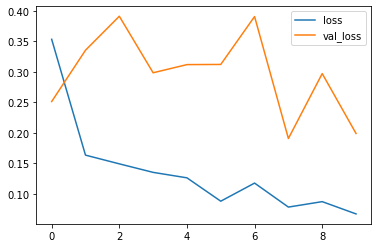

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Plotting accuracy per iteration

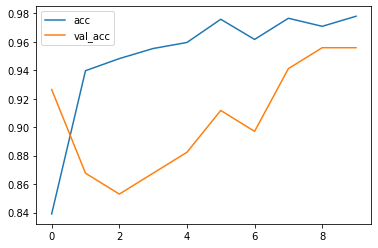

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[0.]]


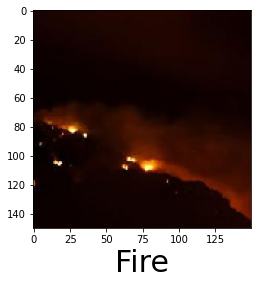

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc172.jpg")

[[0.]]


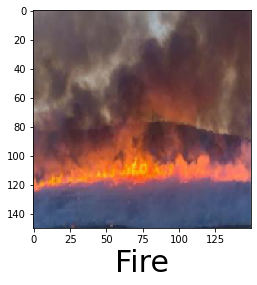

In [ ]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/fire/abc178.jpg')

[[1.]]


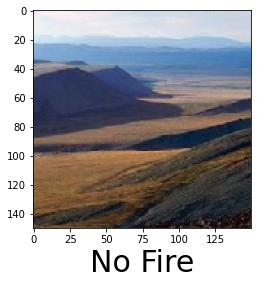

In [ ]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc347.jpg')

[[1.]]


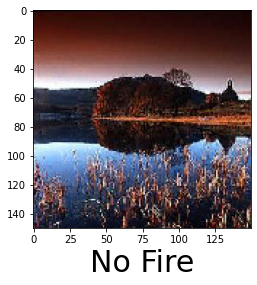

In [ ]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc367.jpg')

[[0.]]


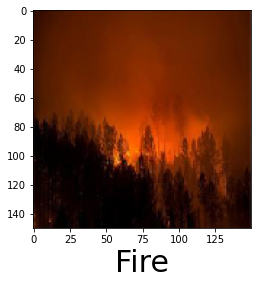

In [ ]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc012.jpg')

[[0.]]


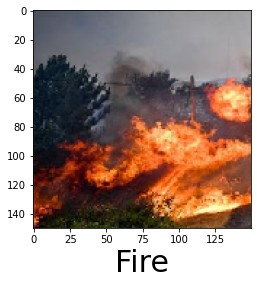

In [ ]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc051.jpg')

[[1.]]


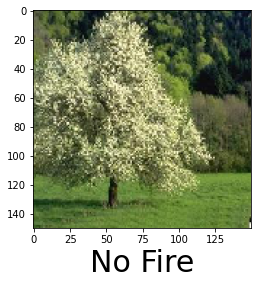

In [ ]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/nofire/abc218.jpg')

predicting images from google

[[1.]]


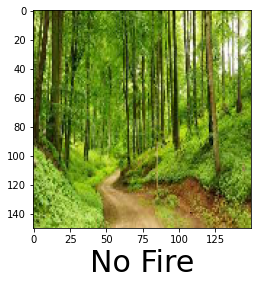

In [ ]:
predictImage('/content/drive/MyDrive/download.jfif')

[[1.]]


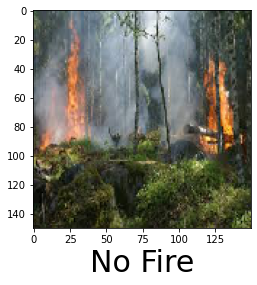

In [ ]:
predictImage('/content/drive/MyDrive/images (1).jfif')

[[1.]]


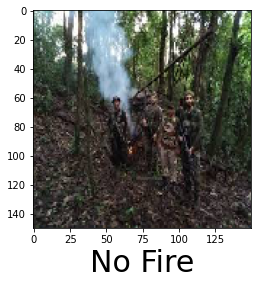

In [ ]:
predictImage('/content/drive/MyDrive/images.jfif')



-----



# Final Thoughts



1.   Model is well performing in testing.
2.   It has failed to predict the second last image downloaded from web.
3.   The model can be improved further more as the graphs showing accuracy and loss are bit messy.
4.   Transfer Learning can be used to reduce the learning/training time significantly.







---

